# *Statistics coded*: Young people - social inclusion 

Prepared by [**J.Grazzini**](mailto:jacopo.grazzini@ec.europa.eu) (*Eurostat*).

This notebook illustrates the principles of storytelling through literate programming by reproducing some of the figures of the _Statistics Explained_article on [**young people and social inclusion**](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Young_people_-_social_inclusion). 

In [38]:
library("eurostat") 
library("ggplot2")
library("tidyr")

In [2]:
library(repr)
options(repr.plot.width=8, repr.plot.height=3)

In [60]:
id = "ilc_li02"
# id <-search_eurostat("At-risk-of-poverty rate by poverty threshold, age and sex")$code[1]
dat <-get_eurostat(id, time_format = "num", filters = list(age="Y16-29", time="2017", unit="PC"))
head(dat)

unit indic_il sex age    geo time values
1 PC   LI_R_M40 F   Y16-29 AT  2017 11.2  
2 PC   LI_R_M40 F   Y16-29 BE  2017  5.9  
3 PC   LI_R_M40 F   Y16-29 BG  2017 19.3  
4 PC   LI_R_M40 F   Y16-29 CH  2017   NA  
5 PC   LI_R_M40 F   Y16-29 CY  2017  6.4  
6 PC   LI_R_M40 F   Y16-29 CZ  2017  3.8

In [17]:
ctries <- c("EU28", "DK", "RO", "ES", "EL", "IT", "SE", "BG", "LU", "PT", "NL", "DE", "FI", "IE", "BE", "FR", "EE", "AT", "UK", "PL", "HR", "CY", "LV", "HU", "SK", "MT", "SI", "CZ", "NO", "CH", "IS", "RS", "MK", "TR")

Warning message:
“Removed 8 rows containing missing values (position_stack).”

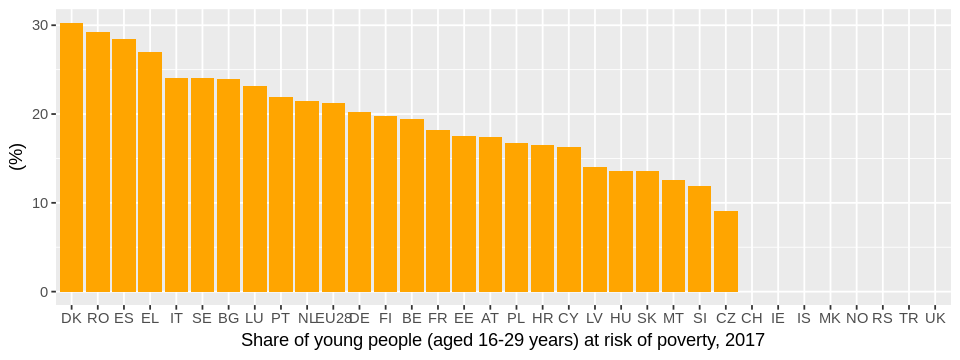

In [18]:
p<-ggplot(data=subset(dat, indic_il == "LI_R_MD60" & sex == "T" & geo %in% ctries), 
              aes(x=reorder(geo, -values), y=values)) +
 geom_bar(stat="identity", fill="orange") +
 xlab("Share of young people (aged 16-29 years) at risk of poverty, 2017") +
 ylab("(%)") 
print(p)

In [19]:
id = "ilc_lvps08"
# id <-search_eurostat("Share of young adults aged 18-34 living with their parents by age and sex", fixed = TRUE)$code[1]
dat <-get_eurostat(id, time_format = "num", filters = list(time="2017", unit="PC"))
head(dat)

age    sex unit geo time values
1 Y16-19 F   PC   AT  2017 96.1  
2 Y16-19 F   PC   BE  2017 95.5  
3 Y16-19 F   PC   BG  2017 87.8  
4 Y16-19 F   PC   CH  2017   NA  
5 Y16-19 F   PC   CY  2017 98.6  
6 Y16-19 F   PC   CZ  2017 97.2

Warning message:
“Removed 16 rows containing missing values (geom_bar).”

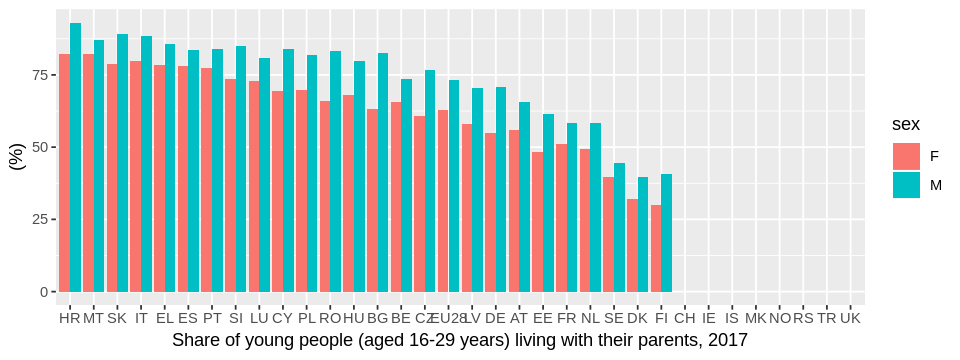

In [20]:
p<-ggplot(data=subset(dat, geo %in% ctries & sex %in% c("F", "M") & age == "Y16-29"), 
              aes(x=reorder(geo, -values), y=values, fill=sex)) +
 geom_bar(stat="identity", position=position_dodge()) +
 xlab("Share of young people (aged 16-29 years) living with their parents, 2017") +
 ylab("(%)") 
print(p)

Warning message:
“Removed 24 rows containing missing values (geom_point).”

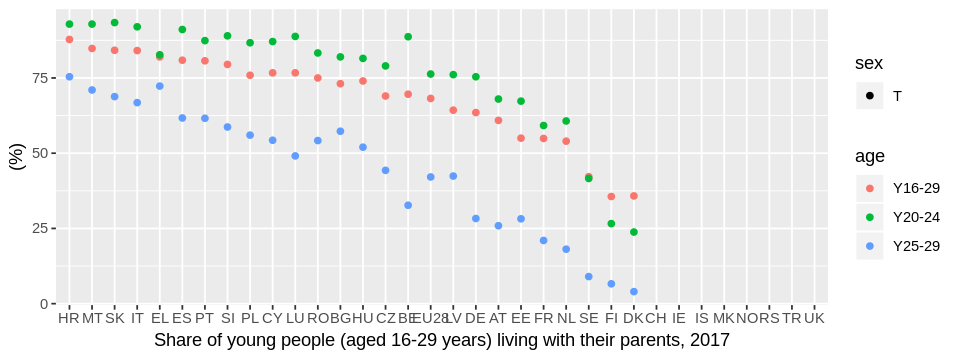

In [23]:
p<-ggplot(data=subset(dat, geo %in% ctries & sex == "T" & age %in% c("Y16-29","Y20-24","Y25-29")), 
              aes(x=reorder(geo, -values), y=values, fill=sex, col=age)) +
 geom_point() +
 xlab("Share of young people (aged 16-29 years) living with their parents, 2017") +
 ylab("(%)") 
print(p)

In [58]:
id = "ilc_peps01"
# id <-search_eurostat("People at risk of poverty or social exclusion by age and sex")$code[1]
dat <-get_eurostat(id, time_format = "num", filters=list(unit="PC", geo="EU28", age="Y16-29"))
head(dat)

unit age    sex geo  time values
1 PC   Y16-29 F   EU28 2007   NA  
2 PC   Y16-29 F   EU28 2008   NA  
3 PC   Y16-29 F   EU28 2009   NA  
4 PC   Y16-29 F   EU28 2010 28.0  
5 PC   Y16-29 F   EU28 2011 29.1  
6 PC   Y16-29 F   EU28 2012 30.2

Warning message:
“Removed 9 rows containing missing values (geom_point).”

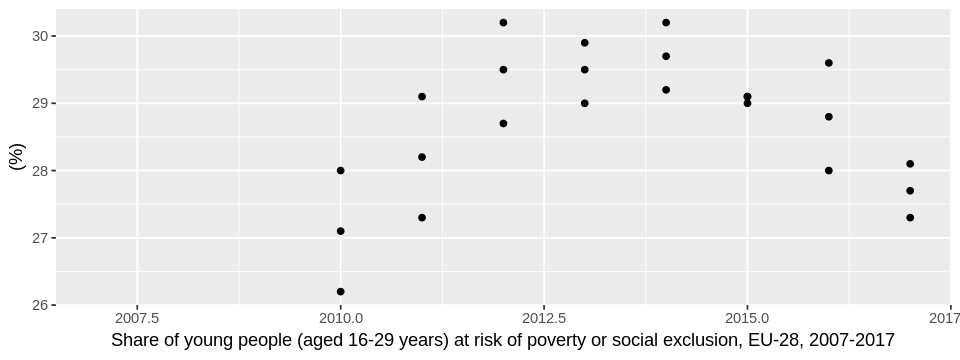

In [59]:
p<-ggplot(data=dat, aes(x=time, y=values, group=sex)) +
 geom_point() +
 xlab("Share of young people (aged 16-29 years) at risk of poverty or social exclusion, EU-28, 2007-2017 - by sex") +
 ylab("(%)") 
print(p)

In [68]:
id = "ilc_li02"
# id <-search_eurostat("At-risk-of-poverty rate by poverty threshold, age and sex", fixed = TRUE)$code[1]
dat <-get_eurostat(id, time_format = "num", filters = list(unit="PC", geo="EU28", indic_il="LI_R_MD60", sex="T", age=c("Y16-29","Y20-24","Y25-29")))
head(dat)

unit indic_il  sex age    geo  time values
1 PC   LI_R_MD60 T   Y16-29 EU28 1995 NA    
2 PC   LI_R_MD60 T   Y16-29 EU28 1996 NA    
3 PC   LI_R_MD60 T   Y16-29 EU28 1997 NA    
4 PC   LI_R_MD60 T   Y16-29 EU28 1998 NA    
5 PC   LI_R_MD60 T   Y16-29 EU28 1999 NA    
6 PC   LI_R_MD60 T   Y16-29 EU28 2000 NA

Warning message:
“Removed 45 rows containing missing values (geom_point).”

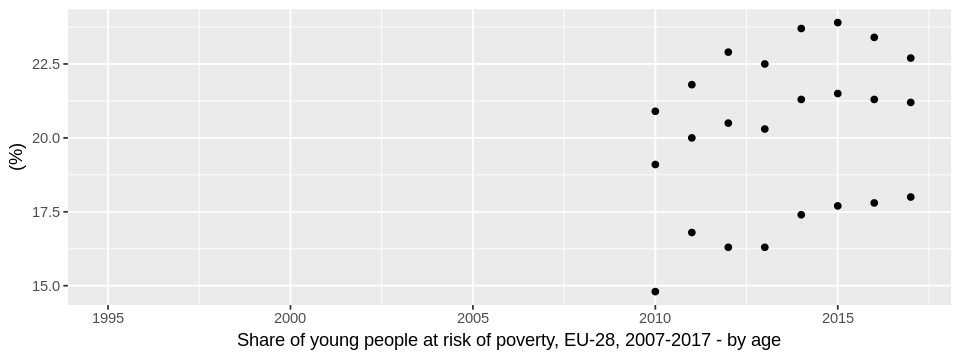

In [69]:
p<-ggplot(data=dat, aes(x=time, y=values, group=age)) +
 geom_point() +
 xlab("Share of young people at risk of poverty, EU-28, 2007-2017 - by age") +
 ylab("(%)") 
print(p)

In [73]:
id = "yth_incl_060"
# id <-search_eurostat("Young people's at-risk-of-poverty rate by sex, age and living/not living with parents", fixed = TRUE)$code[1]
dat <-get_eurostat(id, time_format = "num", filters = list(time="2016"))
head(dat)

age    sex hhstatus unit   geo time values
1 Y16-19 F   P_NPAR   PC_POP AT  2016 44.8  
2 Y16-19 F   P_NPAR   PC_POP BE  2016   NA  
3 Y16-19 F   P_NPAR   PC_POP BG  2016 74.4  
4 Y16-19 F   P_NPAR   PC_POP CH  2016   NA  
5 Y16-19 F   P_NPAR   PC_POP CY  2016   NA  
6 Y16-19 F   P_NPAR   PC_POP CZ  2016   NA

Warning message:
“Removed 12 rows containing missing values (geom_bar).”

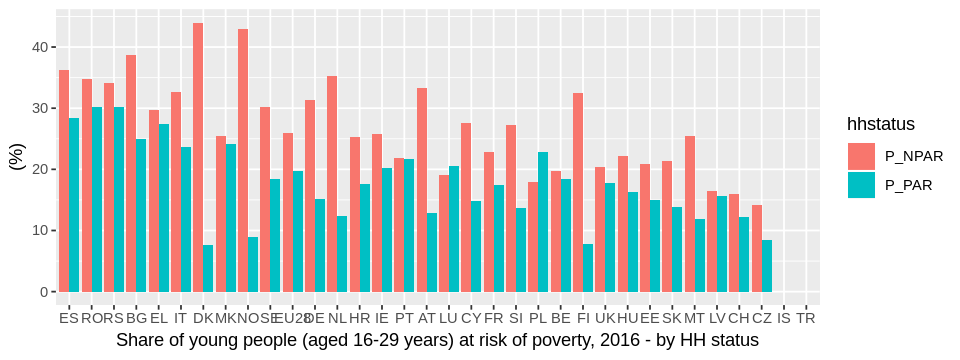

In [74]:
p<-ggplot(data=subset(dat, geo %in% ctries & age == "Y16-29"), 
              aes(x=reorder(geo, -values), y=values, fill=hhstatus)) +
 geom_bar(stat="identity", position=position_dodge()) +
 xlab("Share of young people (aged 16-29 years) at risk of poverty, 2016 - by HH status") +
 ylab("(%)") 
print(p)